# Chapter 3: Exponential Smoothing

Simple exponential smoothing is one of the simplest ways to forecast a time series; we will use it later as a building block in many more powerful models. The idea is to assume that the future will be more or less the same as the (recent) past. The only pattern that this model will be able to learn from demand history is its **level**. The level is the average value around which the demand varies over time. The exponential smoothing model will then forecast the future demand as its last estimation of the level. 

This simple exponential smoothing model will have some advantages compared to a naive or a moving average model:
- the weight that is put on each observation decreases exponentially over time
- outliers and noise have less impact than with a naive forecast


## Model

The underlying idea of any exponential smoothing model is that, at each period, the model will learn a bit from the most recent demand observation and remember a bit of the last forecast it did. The smoothing parameter (or learning rate) alpha ($\alpha$) will determine how much importance is given to the most recent demand observation:

$$f_t = \alpha d_{t-1} + (1-\alpha)f_{t-1}, \quad 0 < \alpha \leq 1.$$

The magic about this formula is that the last forecast made by the model was already including a part of the previous demand observation and a part of the previous forecast. This means that the previous forecast includes everything the model learned so far based on demand history.

There is an important trade-off to be made here between learning and remembering, between being reactive and being stable. If alpha is high, the model will allocate more importance to the most recent demand observation (i. e., the model will learn fast), and it will be reactive to a change in the demand level. But it will also be sensitive to outliers and noise. On the other hand, if alpha is low, the model won't rapidly notice a change in level, but will also not overreact to noise and outliers.

### Future forecast

Once we are out of the historical period, we need to populate a forecast for future periods. This is simple: the last forecast—the one based on the most recent demand observation—is simply extrapolated into the future:

$$f_{t > T} = f_{T}$$

## Model initialization

There are a couple of different options for initializing the model:
- simple: $f_0=d_0$,
- averaging first $n$ observations: $f_0=\frac{1}{n}\sum d_t$


Usually, a reasonable range for $\alpha$ is between 0.05 and 0.5. If $\alpha$ is higher than 0.5, it means that the model is allocating nearly no importance to demand history. The forecast will almost solely be based on the latest observations. That would be a hint that something is wrong with the model.

## Model limitations

This simple exponential smoothing model is slightly smarter than the moving average model, thanks to its clever weighting of the historical demand observations, but it still has many limitations:
- it does not project trends. We will solve this with our next model: the exponential smoothing with trend (double exponential smoothing),
- it does not recognise any seasonal pattern. We will solve this with the triple exponential smoothing model,
- it cannot use any external explanatory variables (pricing, marketing expenses...).


The first exponential smoothing model will be most likely too simple to achieve good results, but it is a foundation on top of which we will create more complex models later.
 

In [3]:
import support

d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = support.simple_exp_smooth(d, extra_periods=4, alpha=0.4)

In [4]:
support.kpi(df)

Bias: -2.02, -13.56%
MAPE: 19.25%
MAE: 2.74, 18.39%
RMSE: 3.89, 26.11%


<Axes: title={'center': 'Simple Smoothing'}, xlabel='Period'>

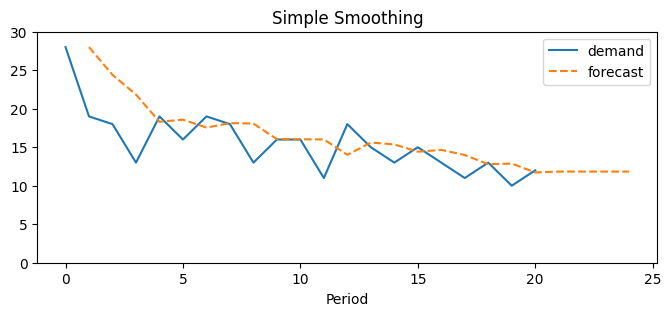

In [5]:
df.index.name = "Period"

df[["demand", "forecast"]].plot(figsize = (8, 3), title="Simple Smoothing", ylim=(0, 30), style=["-", "--"])

In [6]:
df["demand"].mean()

15.523809523809524

In [7]:
df

,demand,forecast,error
Period,,,
0,28.0,NaN,NaN
1,19.0,28.000000,-9.000000
2,18.0,24.400000,-6.400000
3,13.0,21.840000,-8.840000
4,19.0,18.304000,0.696000
5,16.0,18.582400,-2.582400
6,19.0,17.549440,1.450560
7,18.0,18.129664,-0.129664
8,13.0,18.077798,-5.077798
